In [1]:
!git clone https://github.com/inttx/DLAM_SealedSurfaces.git
%cd DLAM_SealedSurfaces

Cloning into 'DLAM_SealedSurfaces'...
remote: Enumerating objects: 173, done.
remote: Counting objects: 100% (173/173), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 173 (delta 109), reused 111 (delta 63), pack-reused 0 (from 0)
Receiving objects: 100% (173/173), 228.26 KiB | 17.56 MiB/s, done.
Resolving deltas: 100% (109/109), done.
/content/DLAM_SealedSurfaces


In [2]:
!pip install -r requirements.txt
%cd src

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 106.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 102.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitli

In [3]:
from torch.utils.data import DataLoader
from torch import nn
from torch.optim import AdamW

from settings import *
from dataset import PotsdamDataset, get_data_loaders
from models import custom_resnet18, baseline_deeplabv3_resnet101, seg_former
from train import train_loop, set_requires_grad

In [4]:
try:
    import os
    import shutil
    from google.colab import drive
    MOUNTPOINT = '/content/drive/'
    drive.mount(MOUNTPOINT)

    IMAGE_PATH = os.path.join(MOUNTPOINT, 'MyDrive', 'DLAM', '2_Ortho_RGB') # TODO adjust to your path
    LABEL_PATH = os.path.join(MOUNTPOINT, 'MyDrive', 'DLAM', '5_Labels_all') # TODO adjust to your path

    SAVE_PATH = MOUNTPOINT + 'MyDrive/DLAM/models/'
    PLOT_PATH = MOUNTPOINT + 'MyDrive/DLAM/plots/'
except:
    IMAGE_PATH = '../data/2_Ortho_RGB' # TODO adjust to your path
    LABEL_PATH = '../data/5_Labels_all' # TODO adjust to your path
    SAVE_PATH = '../models/'
    PLOT_PATH = '../plots/'
os.makedirs(SAVE_PATH, exist_ok=True)
os.makedirs(PLOT_PATH, exist_ok=True)

Mounted at /content/drive/


In [7]:
# Hyperparameters
patch_size = 250
stride = 250
batch_size = 32
num_epochs = 20
lr = 0.001
weight_decay = 1e-2
num_classes = PotsdamDataset.get_num_classes()

# Train resnet18

Building index: 100%|██████████| 24/24 [00:00<00:00, 7154.46it/s]


Epoch 1 / 20: Train Loss = 1.0988


Epoch 1: Validation Loss = 1.0113
Validation improved — model saved to /content/drive/MyDrive/DLAM/models/resnet18.pth


Epoch 2 / 20: Train Loss = 0.9929


Epoch 2: Validation Loss = 0.9905
Validation improved — model saved to /content/drive/MyDrive/DLAM/models/resnet18.pth


Epoch 3 / 20: Train Loss = 0.9711


Epoch 3: Validation Loss = 0.9721
Validation improved — model saved to /content/drive/MyDrive/DLAM/models/resnet18.pth


Epoch 4 / 20: Train Loss = 0.9588


Epoch 4: Validation Loss = 0.9699
Validation improved — model saved to /content/drive/MyDrive/DLAM/models/resnet18.pth


Epoch 5 / 20: Train Loss = 0.9467


Epoch 5: Validation Loss = 0.9676
Validation improved — model saved to /content/drive/MyDrive/DLAM/models/resnet18.pth


Epoch 6 / 20: Train Loss = 0.9442


Epoch 6: Validation Loss = 0.9570
Validation improved — model saved to /content/drive/MyDrive/DLAM/models/resnet18.pth


Epoch 7 / 20: Train Loss = 0.9341


Epoch 7: Validation Loss = 0.9633
No improvement for 1 epoch(s)


Epoch 8 / 20: Train Loss = 0.9344


Epoch 8: Validation Loss = 0.9625
No improvement for 2 epoch(s)


Epoch 9 / 20: Train Loss = 0.9329


Epoch 9: Validation Loss = 0.9611
No improvement for 3 epoch(s)


Epoch 10 / 20: Train Loss = 0.9273


Epoch 10: Validation Loss = 0.9550
Validation improved — model saved to /content/drive/MyDrive/DLAM/models/resnet18.pth


Epoch 11 / 20: Train Loss = 0.9294


Epoch 11: Validation Loss = 0.9622
No improvement for 1 epoch(s)


Epoch 12 / 20: Train Loss = 0.9261


Epoch 12: Validation Loss = 0.9705
No improvement for 2 epoch(s)


Epoch 13 / 20: Train Loss = 0.9214


Epoch 13: Validation Loss = 0.9547
Validation improved — model saved to /content/drive/MyDrive/DLAM/models/resnet18.pth


Epoch 14 / 20: Train Loss = 0.9226


Epoch 14: Validation Loss = 0.9527
Validation improved — model saved to /content/drive/MyDrive/DLAM/models/resnet18.pth


Epoch 15 / 20: Train Loss = 0.9200


Epoch 15: Validation Loss = 0.9498
Validation improved — model saved to /content/drive/MyDrive/DLAM/models/resnet18.pth


Epoch 16 / 20: Train Loss = 0.9178


Epoch 16: Validation Loss = 0.9553
No improvement for 1 epoch(s)


Epoch 17 / 20: Train Loss = 0.9188


Epoch 17: Validation Loss = 0.9629
No improvement for 2 epoch(s)


Epoch 18 / 20: Train Loss = 0.9174


Epoch 18: Validation Loss = 0.9602
No improvement for 3 epoch(s)


Epoch 19 / 20: Train Loss = 0.9164


Epoch 19: Validation Loss = 0.9543
No improvement for 4 epoch(s)


Epoch 20 / 20: Train Loss = 0.9152


Epoch 20: Validation Loss = 0.9597
No improvement for 5 epoch(s)
Early stopping triggered!
Loss plot saved to /content/drive/MyDrive/DLAM/plots/resnet18.png


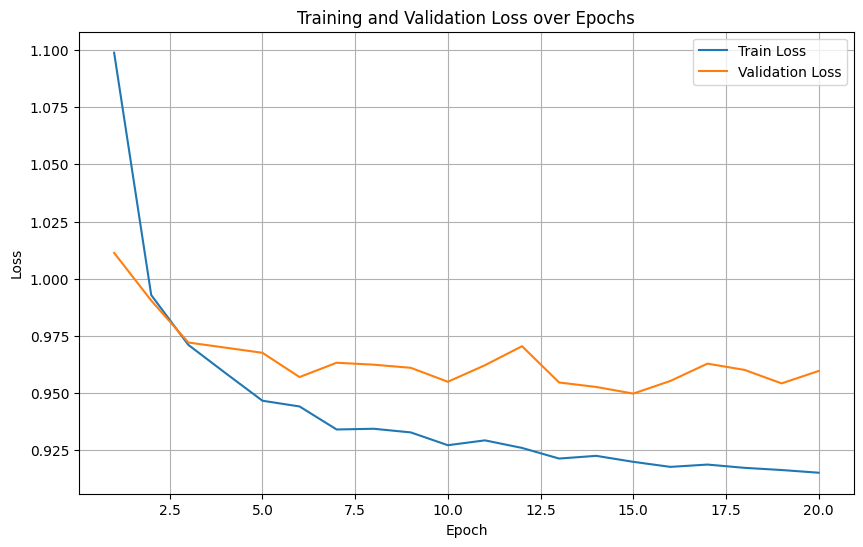

In [8]:
dataset = PotsdamDataset(IMAGE_PATH, LABEL_PATH, patch_size=patch_size, stride=stride, device=DEVICE)
train_loader, val_loader, test_loader = get_data_loaders(dataset, dist=[0.8, 0.1, 0.1], batch_size=batch_size, pin_memory=True, num_workers=4)

model = custom_resnet18(patch_size=patch_size, num_classes=num_classes, device=DEVICE)
loss_fn = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=lr)

train_loop(train_loader=train_loader, val_loader=val_loader, model=model, loss_fn=loss_fn, optimizer=optimizer, num_epochs=num_epochs, device=DEVICE, save_path=SAVE_PATH + 'resnet18.pth', model_type='ResNet18', plot_path=PLOT_PATH + 'resnet18.png', patch_size=patch_size, num_classes=num_classes)

# Train DeepLabV3 resnet101 baseline

In [ ]:
train_loader, val_loader, test_loader = get_data_loaders(IMAGE_PATH, LABEL_PATH,patch_size,
                     stride,
                     dist=[0.8, 0.1, 0.1],
                     batch_size=batch_size,
                     device=DEVICE,
                     mode="single",
                     pin_memory=True,
                     num_workers=4,
                     seed=42)

model = baseline_deeplabv3_resnet101(num_classes=num_classes, device=DEVICE)
loss_fn = nn.CrossEntropyLoss()

# ---------- Stage 1: Train decoder only ----------
set_requires_grad(model.backbone, False)
set_requires_grad(model.classifier, True)

optimizer = AdamW(model.classifier.parameters(), lr=1e-3, weight_decay=1e-4)

train_loop(train_loader, val_loader, model, loss_fn, optimizer,
           num_epochs=20, device=DEVICE,
           save_path=SAVE_PATH + 'deeplab_stage1.pth',
           model_type='DeepLabV3', plot_path=PLOT_PATH + 'deeplab_stage1.png',
           patch_size=patch_size, num_classes=num_classes)

# ---------- Stage 2: Unfreeze last ResNet block ----------
set_requires_grad(model.backbone.layer4, True)

optimizer = AdamW([
    {"params": model.backbone.layer4.parameters(), "lr": 1e-5, "weight_decay": 1e-4},
    {"params": model.classifier.parameters(), "lr": 1e-3, "weight_decay": 1e-4},
])

train_loop(train_loader, val_loader, model, loss_fn, optimizer,
           num_epochs=20, device=DEVICE,
           save_path=SAVE_PATH + 'deeplab_stage2.pth',
           model_type='DeepLabV3', plot_path=PLOT_PATH + 'deeplab_stage2.png',
           patch_size=patch_size, num_classes=num_classes)

# ---------- Stage 3: Full fine-tune ----------
set_requires_grad(model.backbone, True)

optimizer = AdamW([
    {"params": model.backbone.parameters(), "lr": 1e-5, "weight_decay": 1e-4},
    {"params": model.classifier.parameters(), "lr": 1e-4, "weight_decay": 1e-4},
])

train_loop(train_loader, val_loader, model, loss_fn, optimizer,
           num_epochs=30, device=DEVICE,
           save_path=SAVE_PATH + 'deeplab_stage3.pth',
           model_type='DeepLabV3', plot_path=PLOT_PATH + 'deeplab_stage3.png',
           patch_size=patch_size, num_classes=num_classes)

# Train SegFormer

In [ ]:
# --- Data ---
train_loader, val_loader, test_loader = get_data_loaders(IMAGE_PATH, LABEL_PATH,patch_size,
                     stride,
                     dist=[0.8, 0.1, 0.1],
                     batch_size=batch_size,
                     device=DEVICE,
                     mode="single",
                     pin_memory=True,
                     num_workers=4,
                     seed=42)

# --- Model ---
model = seg_former(num_classes, DEVICE)
loss_fn = nn.CrossEntropyLoss()

# ---------- Stage 1: Train decoder only ----------
set_requires_grad(model.segformer.encoder, False)

optimizer = AdamW(model.decode_head.parameters(), lr=1e-3, weight_decay=1e-4)

train_loop(train_loader, val_loader, model, loss_fn, optimizer,
           num_epochs=20, device=DEVICE,
           save_path=SAVE_PATH + 'segformer_stage1.pth',
           model_type='SegFormer', plot_path=PLOT_PATH + 'segformer_stage1.png',
           patch_size=patch_size, num_classes=num_classes)

# ---------- Stage 2: Unfreeze last encoder block ----------
set_requires_grad(model.segformer.encoder, False)
set_requires_grad(model.segformer.encoder.block4, True)

optimizer = AdamW([
    {"params": model.segformer.encoder.block4.parameters(), "lr": 1e-5, "weight_decay": 1e-4},
    {"params": model.decode_head.parameters(), "lr": 1e-3, "weight_decay": 1e-4},
])

train_loop(train_loader, val_loader, model, loss_fn, optimizer,
           num_epochs=20, device=DEVICE,
           save_path=SAVE_PATH + 'segformer_stage2.pth',
           model_type='SegFormer', plot_path=PLOT_PATH + 'segformer_stage2.png',
           patch_size=patch_size, num_classes=num_classes)

# ---------- Stage 3: Full fine-tune ----------
set_requires_grad(model.segformer.encoder, True)

optimizer = AdamW([
    {"params": model.segformer.encoder.parameters(), "lr": 1e-5, "weight_decay": 1e-4},
    {"params": model.decode_head.parameters(), "lr": 1e-4, "weight_decay": 1e-4},
])

train_loop(train_loader, val_loader, model, loss_fn, optimizer,
           num_epochs=30, device=DEVICE,
           save_path=SAVE_PATH + 'segformer_stage3.pth',
           model_type='SegFormer', plot_path=PLOT_PATH + 'segformer_stage3.png',
           patch_size=patch_size, num_classes=num_classes)